In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, classification_report
from sklearn.datasets import load_breast_cancer 

Lets's take a look at the keys in the data set and pull out some analysis based upon it which will help us understand the dataset even better

In [2]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
print(data.target_names)
print(data.feature_names)
print(f"\nshape of data {data.data.shape}")

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

shape of data (569, 30)


As we can see that our data is in the form of numpy arrays we have to convert them into pandas Dataframe.<br>
This is done in ourder to make our dataset convenient to use

<h4>Now time for some EDA on the data</h4>

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df_target = pd.DataFrame(data.target, columns = ['target'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Well thats amazing, there are no null points in the dataset!! thus we are good to do some plotting and visually understand our data 

here the cells with 'Malignant' is labeled as 0 and the 'Benign as 1'
Malignant 357
Benign 212


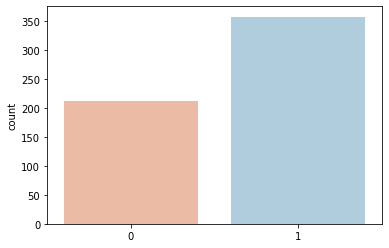

In [6]:
plot = sns.countplot(data.target,
                     palette = 'RdBu',
                    )
print("here the cells with 'Malignant' is labeled as 0 and the 'Benign as 1'")
Malignant, Benign = df_target.value_counts()
print(f"Malignant {Malignant}")
print(f"Benign {Benign}")

In [7]:
data_target_df = pd.merge(df, df_target, left_index = True, right_index = True)
data_target_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


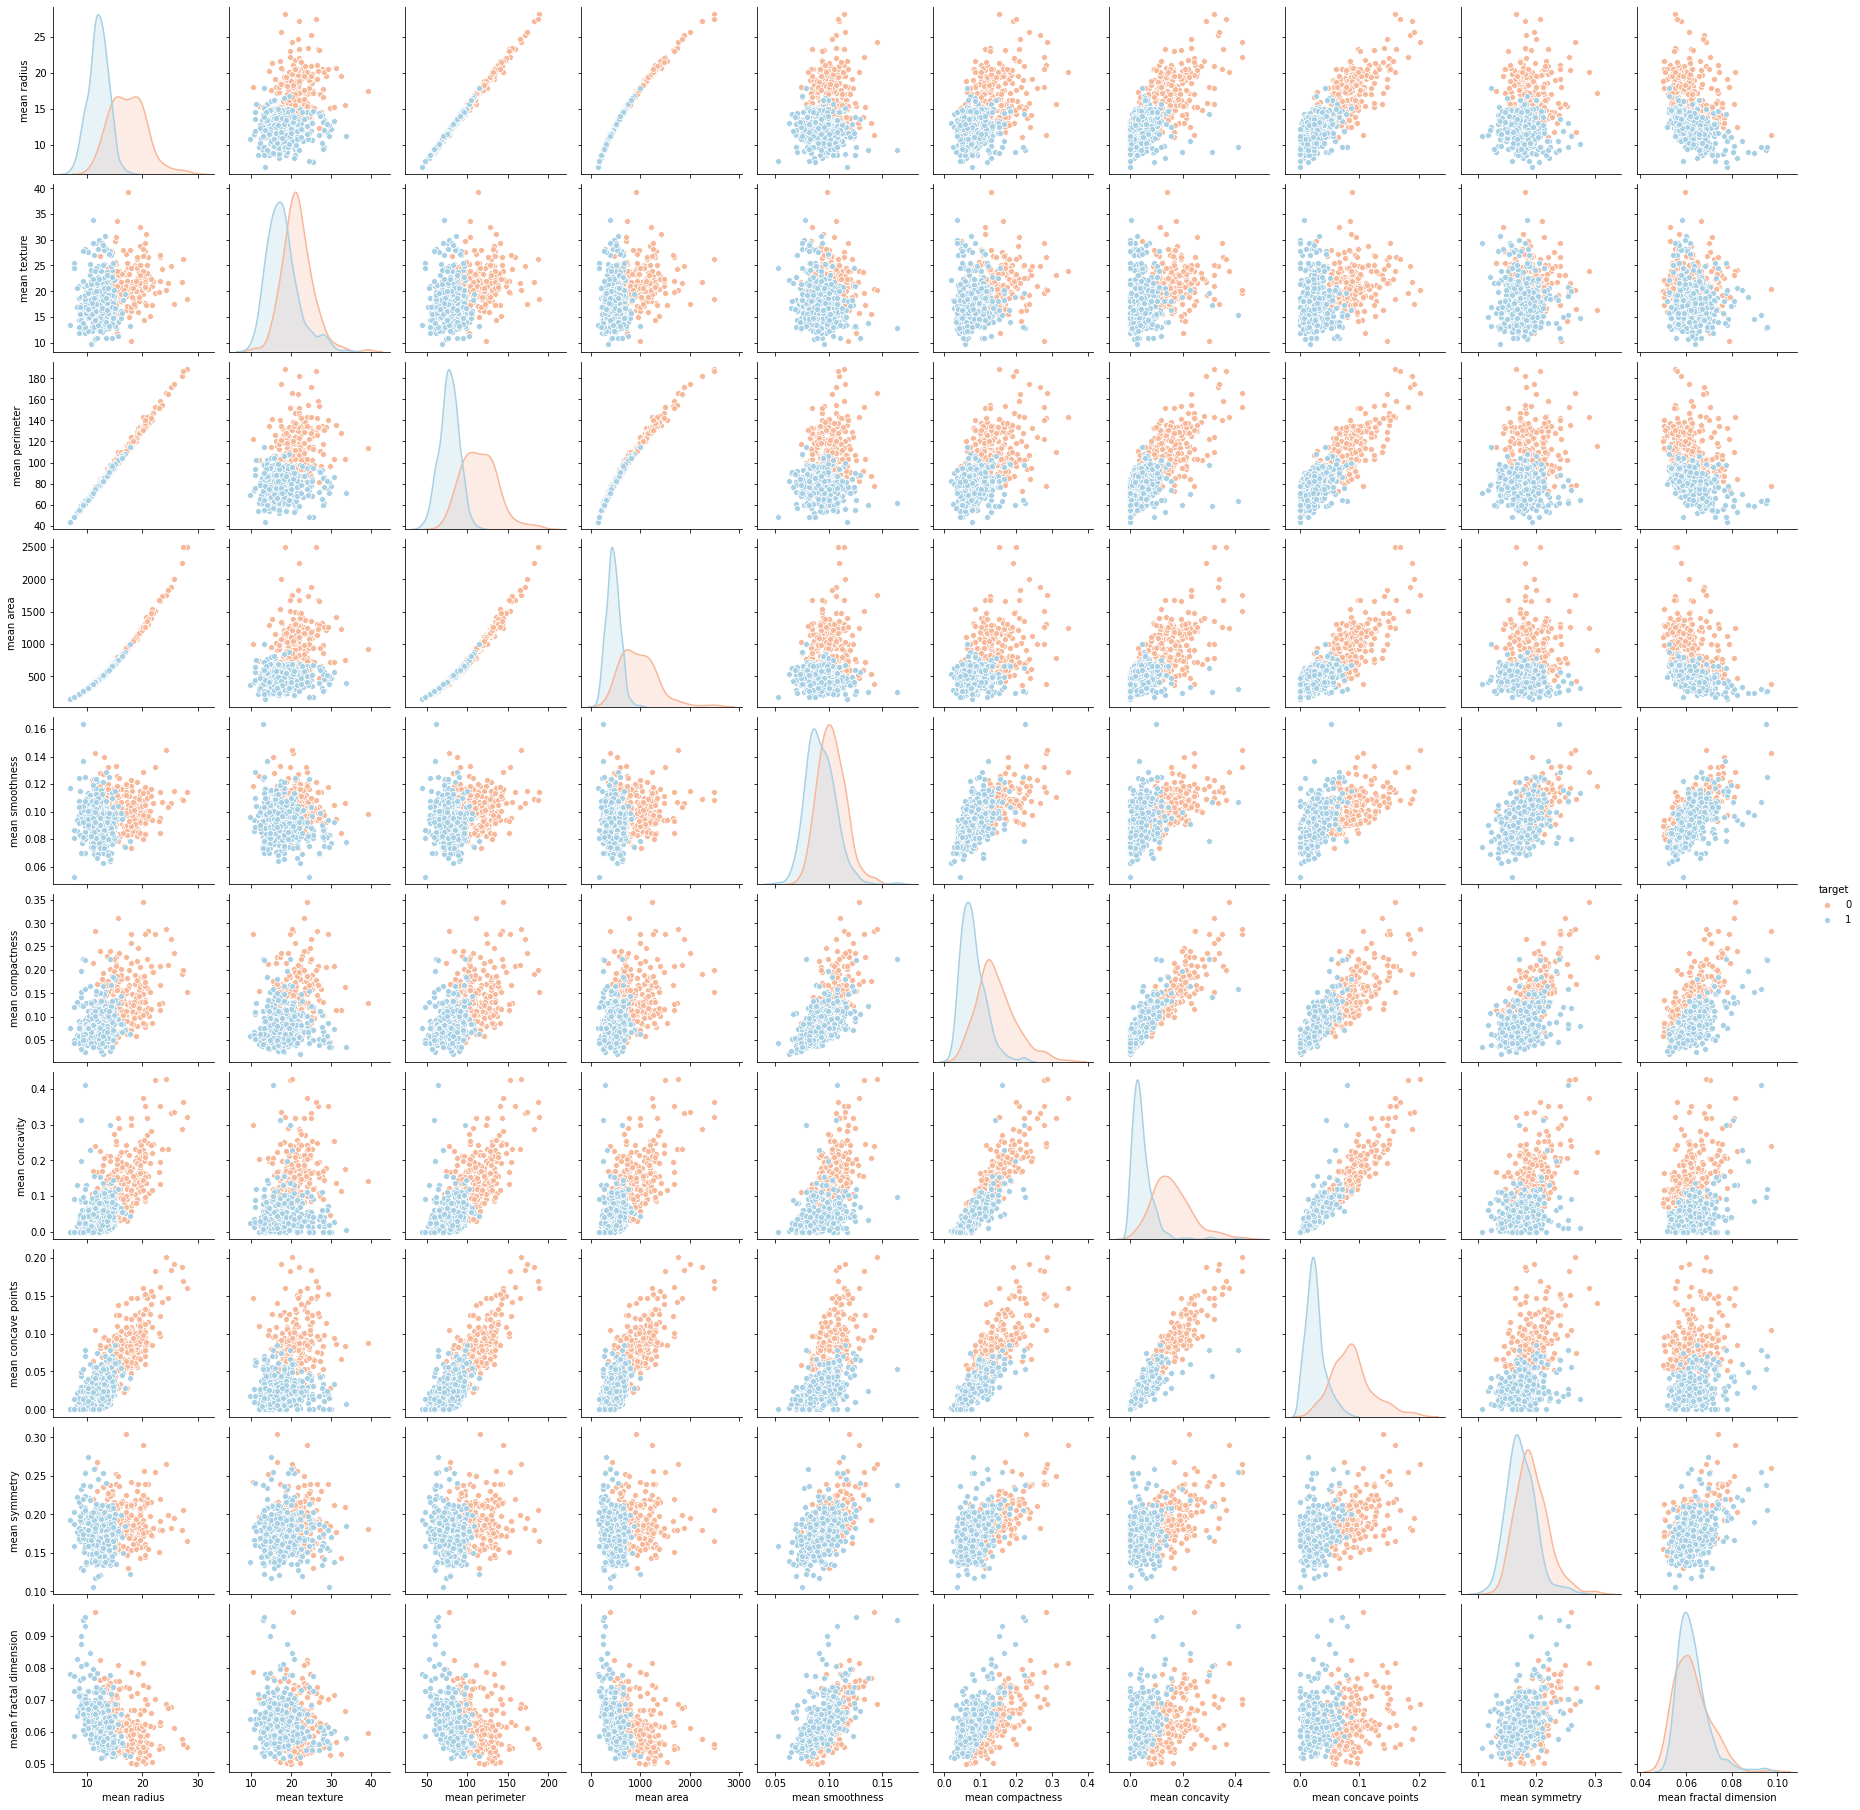

In [8]:
cols = ['mean radius',
        'mean texture',
        'mean perimeter',
        'mean area',
        'mean smoothness',
        'mean compactness',
        'mean concavity',
        'mean concave points',
        'mean symmetry',
        'mean fractal dimension',
        'target']
sns.pairplot(data = data_target_df[cols],
             hue = 'target',
             palette = 'RdBu')

Now that we can see patterns in the pair plot we need more authenticity in doing so <br>
thus now we will plot a heat mp giving the correlation between attributes

<AxesSubplot:>

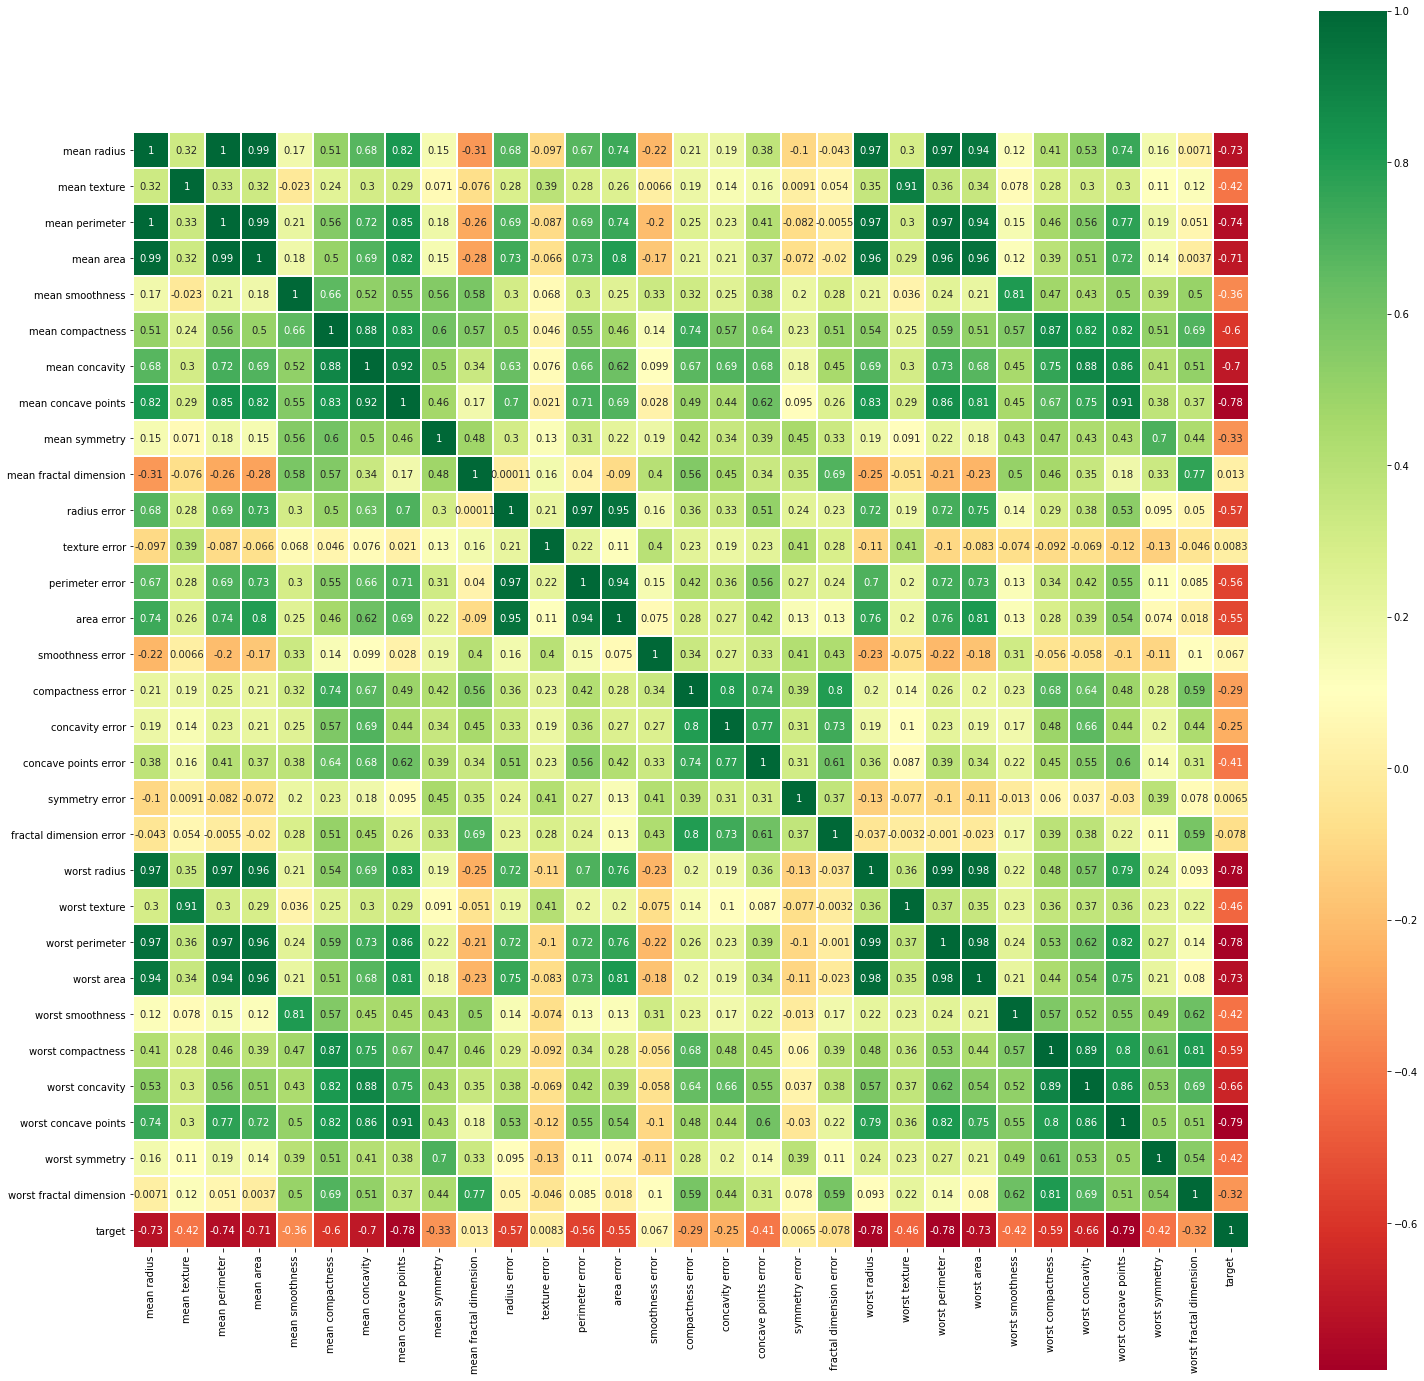

In [9]:
fig, ax = plt.subplots(figsize = (25,25))    #this changes the size of the matrix
sns.heatmap(data_target_df.corr(),
            square = True,
            cmap = 'RdYlGn',
            linewidth = .5,
            ax = ax,
            annot = True,
           )

<h4><center>observations made</center></h4>
<ol>
    <li>All the worst and mean values have correlation of 0.7 and greater </li>
    <li>correlation of radius, perimeter, area ae very high thus can keep only radius</li>
    <li>Since we cannot make any sense out of the error factors, we can as well remove them</li>
    <li>we can remove the concavity and convexity related terms as well since their correlation is also high</li>
</ol>

In [10]:
cols = ['radius error','texture error','perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter',
         'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
df_final = data_target_df.drop(cols, axis = 1)
df_final.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0


In [11]:
#since radius, area, perimeter all have almost the same core we can have one among them and,
#we can have compactness overconvativity and concave points
col = ['mean perimeter', 'mean area', 
       'mean concavity', 'mean concave points']
df = df_final.drop(col, axis = 1)

In [12]:
df.head()

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.2419,0.07871,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.05667,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.05999,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.09744,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.05883,0


<AxesSubplot:>

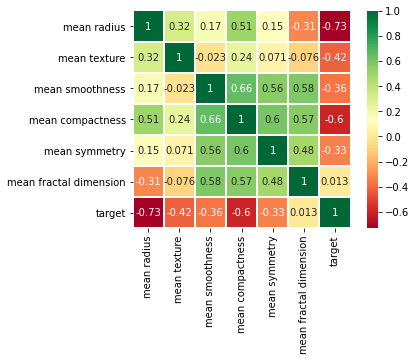

In [13]:
sns.heatmap(data = df.corr(),
            square = True, 
            linewidth = 0.5, 
            cmap = 'RdYlGn',
            annot = True)

<center><h4>Running Machine Learning Models</h4></center>

In [14]:
#splitting the data set
X = df.drop('target', axis = 1)
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)
logreg = LogisticRegression()

<h4>tuning the hyperparmeters for the model using the hyerparameter randomized method</h4>

In [15]:
c_space = np.logspace(-5, 8, 15)                            #values taken from datacamp
l1_space = np.linspace(0, 30)
param_grid = {'C': c_space, 'l1_ratio': l1_space}
logreg_cv = RandomizedSearchCV(logreg, param_grid, cv = 10)
logreg_cv.fit(X_train, y_train)                             #here we have kept the X_test as holdout and crossvalidated with X_train
print("the best cv value of C is ",logreg_cv.best_params_)
# print("the l1 ratio in this perticular model is",logreg_cv.)
print("the corresponding score obtained is ", logreg_cv.best_score_)

C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\sit

C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\sit

C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\sit

the best cv value of C is  {'l1_ratio': 9.795918367346939, 'C': 2275.845926074791}
the corresponding score obtained is  0.9149579831932773


C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [16]:
#running the logistic regression model
logreg = LogisticRegression(C = logreg_cv.best_params_['C'], l1_ratio = logreg_cv.best_params_['l1_ratio'])
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "


In [17]:
#plotting the ROC curve to know at what probability does our model perform best and how good is our model
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

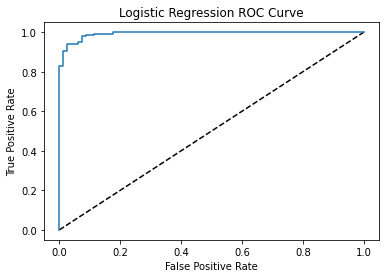

In [18]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

Now cross validating the AUC score in order to find outhow good is our model

In [19]:
cross_val = cross_val_score(logreg,X, y, cv = 10, scoring = 'roc_auc')
print(np.mean(cross_val))

C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:

0.9836346457775027


C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1315: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn("l1_ratio parameter is only used when penalty is "
C:\Users\SUKHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now that we are convinced that our model's cross validation score is good enough for our prediction, lets look ath the score and then get the final output

In [20]:
logreg.score(X_test, y_test) #the accuracy test

0.9429824561403509

<b>So this is our model with good accuracy and these are our predicted results</b>

In [21]:
print(y_pred)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [22]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 74   6]
 [  7 141]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        80
           1       0.96      0.95      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228

